In [2]:
from svfpy import svfpy
import numpy as np
import geopandas as gpd
import pandas as pd
import rioxarray
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
svf_sp = rioxarray.open_rasterio('/media/fernando/DATA/svf-sp/svf_all.tiff',chunks="auto")
svf_ny = rioxarray.open_rasterio('/media/fernando/DATA/svf-nyc/svf_all.tiff')
gdf_nyc_validation = gpd.read_file('validation/nyc_patial_validation.gpkg')
gdf_sp_validation = gpd.read_file('validation/sp_patial_validation.gpkg')

In [4]:
gdf_sp_validation

,rand_point_id,svf,svf_calculated,svf_calculated_perc,geometry
0,0,0.699656,178,0.695312,POINT (337551.970 7389303.244)
1,1,0.872403,229,0.894531,POINT (329900.845 7361363.019)
2,2,0.502061,187,0.730469,POINT (353766.714 7396364.482)
3,3,0.763747,173,0.675781,POINT (335975.307 7391343.251)
4,4,0.663045,199,0.777344,POINT (334898.530 7389013.911)
...,...,...,...,...,...
380,380,0.789636,221,0.863281,POINT (330456.305 7408218.282)
381,381,0.736716,204,0.796875,POINT (323184.516 7362675.713)
382,382,0.706293,188,0.734375,POINT (347016.316 7401145.856)
383,383,0.821888,227,0.886719,POINT (333219.412 7375648.821)


<AxesSubplot:xlabel='svf', ylabel='svf_calculated_perc'>

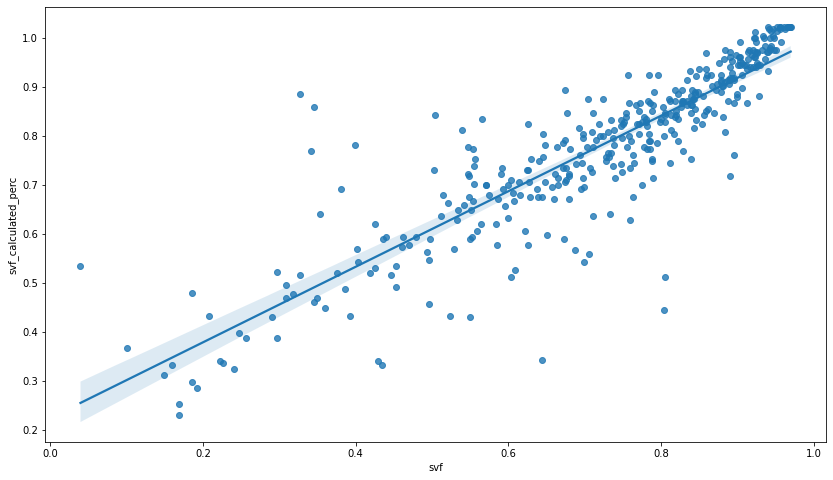

In [5]:
plt.figure(figsize=(14,8))
sns.regplot(x=gdf_sp_validation["svf"], y=gdf_sp_validation["svf_calculated_perc"], order=1)

<AxesSubplot:xlabel='svf', ylabel='Count'>

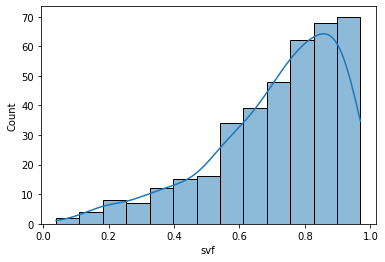

In [6]:
sns.histplot(data=gdf_sp_validation, x="svf", kde=True)

<AxesSubplot:xlabel='svf', ylabel='svf_calculated_perc'>

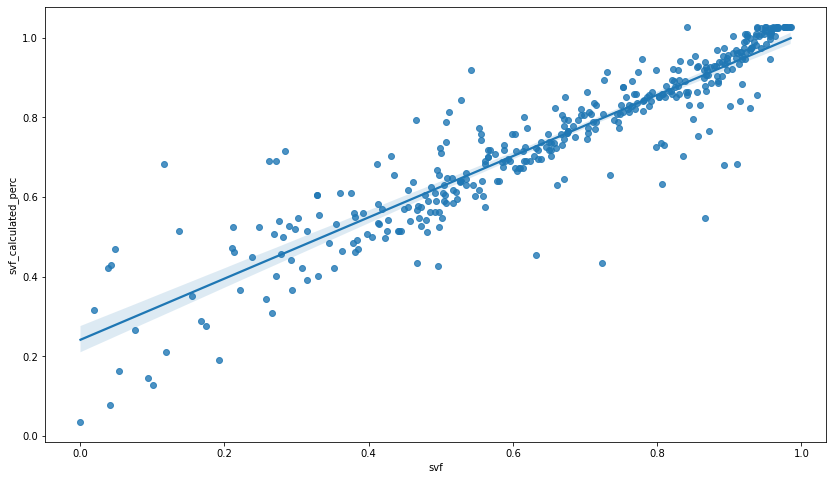

In [9]:
plt.figure(figsize=(14,8))
sns.regplot(x=gdf_nyc_validation["svf"], y=gdf_nyc_validation["svf_calculated_perc"], order=1)

<AxesSubplot:xlabel='svf', ylabel='Count'>

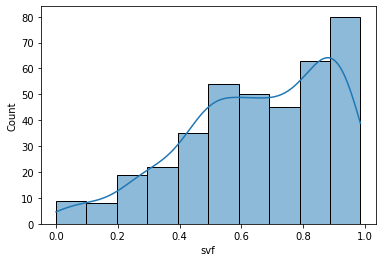

In [43]:
sns.histplot(data=gdf_nyc_validation, x="svf", kde=True)

In [56]:
gdf_sp_validation.loc[:, 'delta_error'] = gdf_sp_validation.loc[:, 'svf_calculated_perc'] - gdf_sp_validation.loc[:, 'svf']
gdf_nyc_validation.loc[:, 'delta_error'] = gdf_nyc_validation.loc[:, 'svf_calculated_perc'] - gdf_nyc_validation.loc[:, 'svf']

gdf_sp_validation.loc[:, 'svf_plus'] = gdf_sp_validation.loc[:, 'svf'] + 0.06
gdf_nyc_validation.loc[:, 'svf_plus'] = gdf_nyc_validation.loc[:, 'svf'] + 0.06

gdf_sp_validation.loc[:, 'delta_error_plus'] = gdf_sp_validation.loc[:, 'svf_calculated_perc'] - gdf_sp_validation.loc[:, 'svf_plus']
gdf_nyc_validation.loc[:, 'delta_error_plus'] = gdf_nyc_validation.loc[:, 'svf_calculated_perc'] - gdf_nyc_validation.loc[:, 'svf_plus']

<AxesSubplot:xlabel='delta_error_plus', ylabel='Count'>

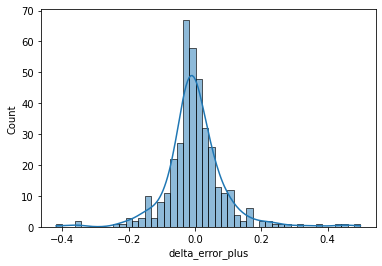

In [57]:
sns.histplot(data=gdf_sp_validation, x="delta_error_plus", kde=True)

In [58]:
gdf_sp_validation.delta_error_plus.describe()

count    385.000000
mean       0.000693
std        0.092728
min       -0.418593
25%       -0.035622
50%       -0.005350
75%        0.034497
max        0.499091
Name: delta_error_plus, dtype: float64

<AxesSubplot:xlabel='delta_error_plus', ylabel='Count'>

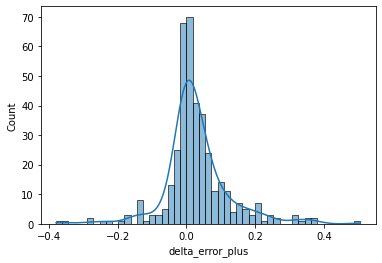

In [59]:
sns.histplot(data=gdf_nyc_validation, x="delta_error_plus", kde=True)

In [60]:
gdf_nyc_validation.delta_error_plus.describe()

count    385.000000
mean       0.029863
std        0.096065
min       -0.379479
25%       -0.009724
50%        0.013698
75%        0.056688
max        0.506722
Name: delta_error_plus, dtype: float64

In [50]:
np.histogram(svf_sp[0, 34000:35000, 19000:20000].values, range=(0, 255), bins=30)

(array([     0,      0,      0,      0,     29,    170,    416,    714,
          1379,   1918,   3136,   4312,   5673,   6373,   9772,  11976,
         17988,  20395,  28437,  30677,  43211,  46394,  62237,  71435,
         98403,  85589, 114277, 130414, 118364,  75285]),
 array([  0. ,   8.5,  17. ,  25.5,  34. ,  42.5,  51. ,  59.5,  68. ,
         76.5,  85. ,  93.5, 102. , 110.5, 119. , 127.5, 136. , 144.5,
        153. , 161.5, 170. , 178.5, 187. , 195.5, 204. , 212.5, 221. ,
        229.5, 238. , 246.5, 255. ], dtype=float32))